# Python Hackathon Questions with Solutions


In [24]:
#pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing the dataset
Patients = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Patients')
EDVisits = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDVisits')
AmbulatoryVisits = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'AmbulatoryVisits')
ReadmissionRegistry = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'ReAdmissionRegistry')
Discharges = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Discharges')
Providers = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Providers')
EDUnique= pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDUnique')

In [3]:
#Code to check if data is imported properly, delete it before submission
#Patients.head()
#EDVisits.head()
#AmbulatoryVisits.head()
#ReadmissionRegistry.head()
#Discharges.head()
#Providers.head()
#EDUnique.head()

In [4]:
#Question 1 - Replace all the null values in ReadmissionFlag with 0.

ReadmissionRegistry['ReadmissionFlag'] = ReadmissionRegistry['ReadmissionFlag'].fillna(0)
ReadmissionRegistry.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN


In [5]:
#Question 2 - Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit

x = input("Please enter reason for visit : ")
count = 0
for reason in EDVisits['ReasonForVisit']:
    if reason == x:
        count+=1
print("Number of patients admitted with {} is {}".format(x, count))

Please enter reason for visit : Pneumonia
Number of patients admitted with Pneumonia is 201


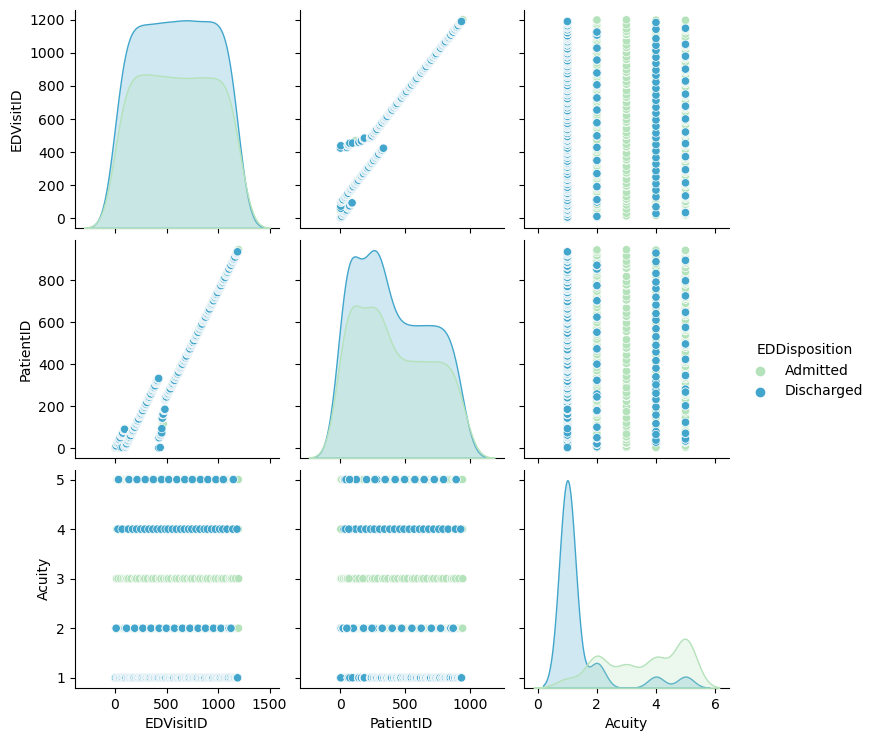

In [6]:
#Question 3 - Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition

sns.pairplot(EDVisits,hue='EDDisposition',palette='GnBu')
plt.show()


In [7]:
#Question 4 - Find the count of Spanish Speaking patients.

count = 0
for language in Patients['Language']:
    if language == 'Spanish':
        count+=1
print("Count of Spanish speaking patients = {}".format(count))

Count of Spanish speaking patients = 110


In [ ]:
#Question 5 - Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T. 
#(Attach screenshots for this question)

In [8]:
#Question 6 - Find the list of patients whose ExpectedLOS is greater than the value given by the user.
x = int(input("Enter a number for expected LOS : "))
print("\nAdmission ID\t Patient ID\t ExpectedLOS ")
for index,row in ReadmissionRegistry.iterrows(): # Method in pandas library to iterate over each row of a dataframe
    if  row['ExpectedLOS'] > x:
            y= round(row['ExpectedLOS'],2)
            print("{}          \t {}   \t         {}".format(row['AdmissionID'], row['PatientID'], y))
  


Enter a number for expected LOS : 3

Admission ID	 Patient ID	 ExpectedLOS 
389          	 1   	         6.72
635          	 2   	         3.83
606          	 3   	         3.38
587          	 5   	         3.76
640          	 6   	         13.65
434          	 7   	         9.56
549          	 8   	         16.47
1          	 9   	         9.65
355          	 10   	         14.79
54          	 11   	         12.08
568          	 12   	         7.16
107          	 13   	         4.55
18          	 14   	         10.06
140          	 14   	         10.55
305          	 15   	         6.37
146          	 16   	         13.83
439          	 17   	         8.36
199          	 18   	         10.42
252          	 19   	         15.35
419          	 19   	         8.2
569          	 20   	         4.9
650          	 20   	         5.48
253          	 21   	         4.75
55          	 23   	         13.33
671          	 23   	         11.37
208          	 23   	         6.38
108          	 24 

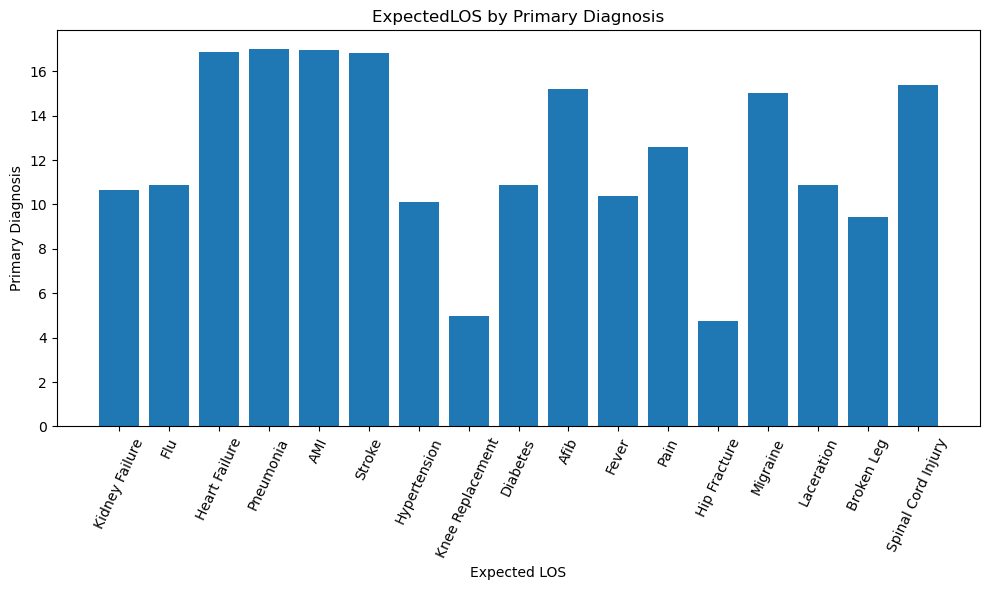

In [9]:
#Question 7 - Create a bar chart between expectedLOS & Primary diagnosis.
x=np.array(ReadmissionRegistry['PrimaryDiagnosis'])
y=np.array(ReadmissionRegistry['ExpectedLOS'])

plt.figure(figsize=(10,6))     #To increase the figure size
plt.bar(x, y)
plt.ylabel('Primary Diagnosis')
plt.xlabel('Expected LOS')
plt.title('ExpectedLOS by Primary Diagnosis')
plt.xticks(rotation = 65)      # To rotate labels by an angle to so they do not overlap
plt.tight_layout()             # To adjust layout of the plot to avoid overlapping labels
plt.show()


In [51]:
#Question 8 - Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

filtered_df = pd.DataFrame() #Initialize the empty data frame
for index,row in EDVisits.iterrows():
    if  ((row['ReasonForVisit'] == 'Pneumonia' or row['ReasonForVisit'] == 'Migrane') and row['Acuity'] >=2):
        filtered_df = filtered_df.append(row, ignore_index = True)

to_display


C:\Users\akila\AppData\Local\Temp\ipykernel_29660\1928899785.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_df = filtered_df.append(row, ignore_index = True)


,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
1,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
2,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
3,32,32,2020-01-01 07:58:39.779,2020-01-02 00:47:40.244,2,Pneumonia,Admitted
4,44,44,2020-01-01 11:41:20.981,2020-01-02 05:18:13.677,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
131,1158,904,2020-01-15 02:06:42.088,2020-01-15 07:04:01.523,4,Pneumonia,Admitted
132,1167,913,2020-01-15 05:09:22.987,2020-01-16 03:57:13.244,4,Pneumonia,Admitted
133,1170,916,2020-01-15 05:57:29.834,2020-01-15 06:03:50.631,4,Pneumonia,Admitted
134,1171,917,2020-01-15 06:27:24.353,2020-01-15 10:16:03.795,2,Pneumonia,Admitted


In [11]:
#Question 9 - "Using numpy functions, multiply the following arrays

a=np.arange(6).reshape(2,3)
print(a)
b=(np.arange(6).reshape(3,2)).T
print(b)
print(a*b)


[[0 1 2]
 [3 4 5]]
[[0 2 4]
 [1 3 5]]
[[ 0  2  8]
 [ 3 12 25]]


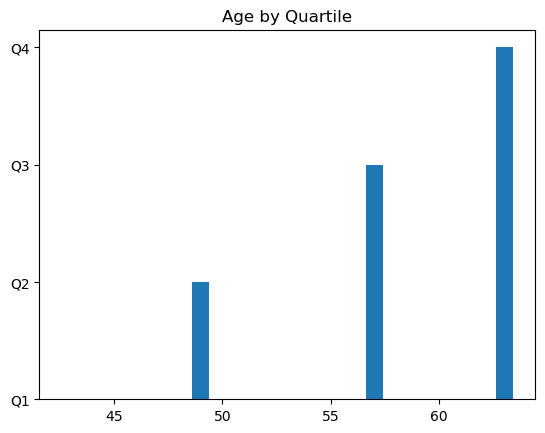

In [12]:
#Question 10 - Display data by splitting age in 4 quartiles and labeling the quartiles.
from datetime import datetime
day = datetime.now()
age_list = []
#Code to caluculate age from date of birth
for index, row in Patients.iterrows():
    dateofbirth = row['DateOfBirth']
    age_timedelta = (day-dateofbirth)
    age_years = age_timedelta.days//365.25
    age_list.append(int(age_years))
    
# Calculating quartiles

x = np.percentile(age_list,[25,50,75,100])
y = ['Q1','Q2', 'Q3', 'Q4']
plt.bar(x,y )
#plt.ylabel('')
plt.title('Age by Quartile')      
plt.show()


In [5]:
#Question 31 - Find the last name of the patients, by getting the first name from the user.
firstname = input("Enter the first name")
display(Patients[Patients['FirstName']==firstname]['LastName'])

Enter the first nameFar


1        Myers
15      Pardon
95    Rudinger
Name: LastName, dtype: object

In [6]:
#Question 32 - Using loc , get the details of the providers where providerId is between 11 and 20 
#and ProviderSpecialty is Surgery.
display(Providers.loc[(Providers.ProviderID >=11) & (Providers.ProviderID <=20) & (Providers.ProviderSpecialty =="Surgery")])

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


In [7]:
#Question 33 - Which reason of visit has maximum mortality rate.
#Assuming the data is to be fetched from the discharges tables and not readmission registry
p1 = Discharges[Discharges.ExpectedMortality == Discharges.ExpectedMortality.max()]
reason = pd.merge(p1,EDUnique, on = 'PatientID')
display(reason['ReasonForVisit'])

0    Pneumonia
Name: ReasonForVisit, dtype: object

In [8]:
#Question 34 - Find the count of White Spanish Male.
display(len(Patients.loc[(Patients.Gender == "Male") & (Patients.Race=="White") & (Patients.Language == "Spanish")]))

15

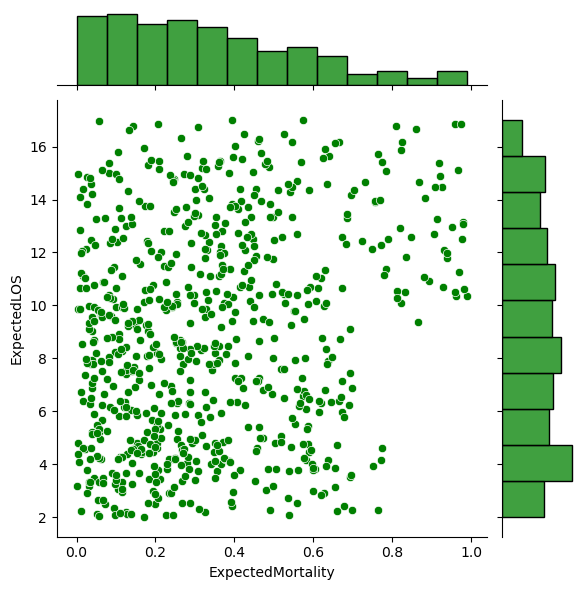

In [9]:
#Question 35 - Create a jointplot on expected mortality & expected length of stay.
#Assuming the data is to be fetched from the discharges tables and not readmission registry
sns.jointplot(data=Discharges, x= 'ExpectedMortality',y='ExpectedLOS',kind= 'scatter',color = 'green')
plt.show()

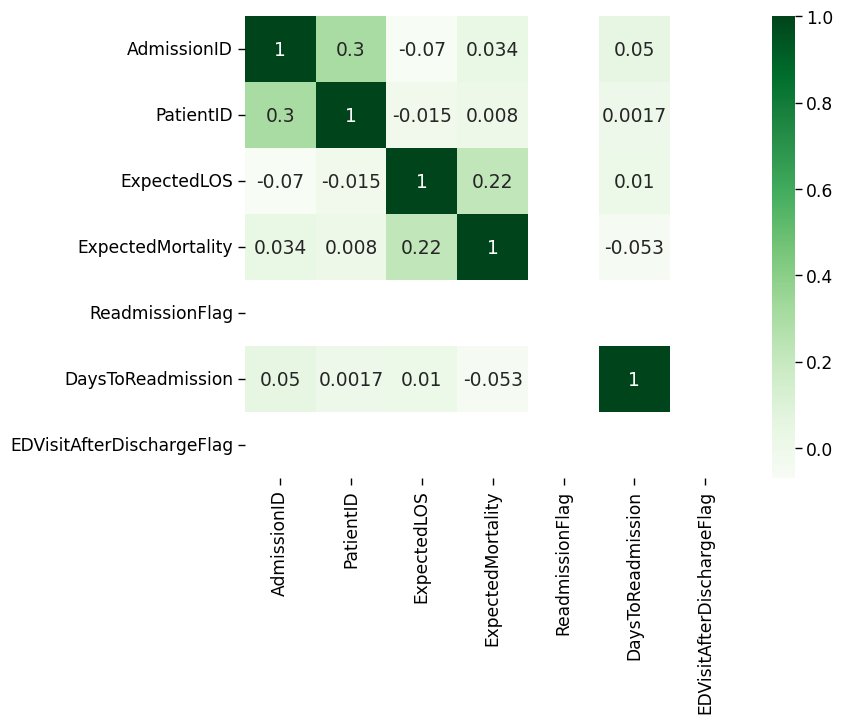

In [10]:
#Question 36 - Create a heat map on Readmission Registry table to find correlation between columns values.
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
Readm_Matrix = ReadmissionRegistry.corr(numeric_only = 'False')
sns.heatmap(Readm_Matrix, annot=True,cmap='Greens')
plt.show()

In [11]:
#Question37 - Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?
#Assuming the data is to be fetched from the discharges tables and not readmission registry
max_elos = Discharges.groupby('PrimaryDiagnosis')['ExpectedLOS'].agg(np.ptp).max()
max_elos
s1 = ReadmissionRegistry.groupby('PrimaryDiagnosis')['ExpectedLOS'].agg(np.ptp)
df1 = s1.to_frame().reset_index()
df1 = df1.rename(columns= {0: 'PrimaryDiagnosis'})
df1.index.name = 'index'
display(df1[df1['ExpectedLOS']==max_elos]['PrimaryDiagnosis'])

index
14    Pneumonia
Name: PrimaryDiagnosis, dtype: object

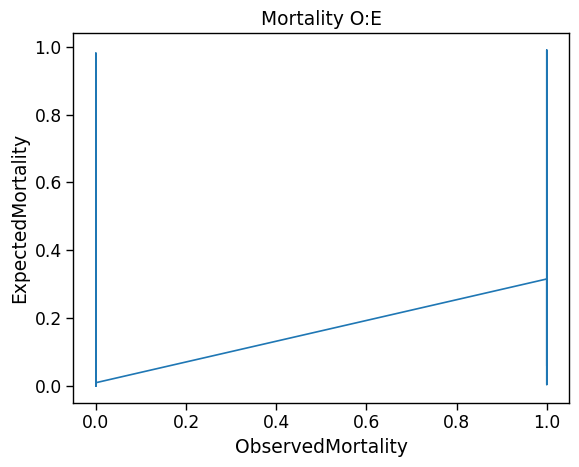

In [12]:
#Question 38 - Mortality O:E
#Assuming the data is to be fetched from the discharges tables and not readmission registry
df2 = Discharges
df2['ObservedMortality'] = np.where(df2['DischargeDisposition'] == 'Expired', 1, 0)
df2
plt.plot(df2['ObservedMortality'],df2['ExpectedMortality'])
plt.xlabel("ObservedMortality")
plt.ylabel("ExpectedMortality")
plt.title("Mortality O:E")
plt.show()

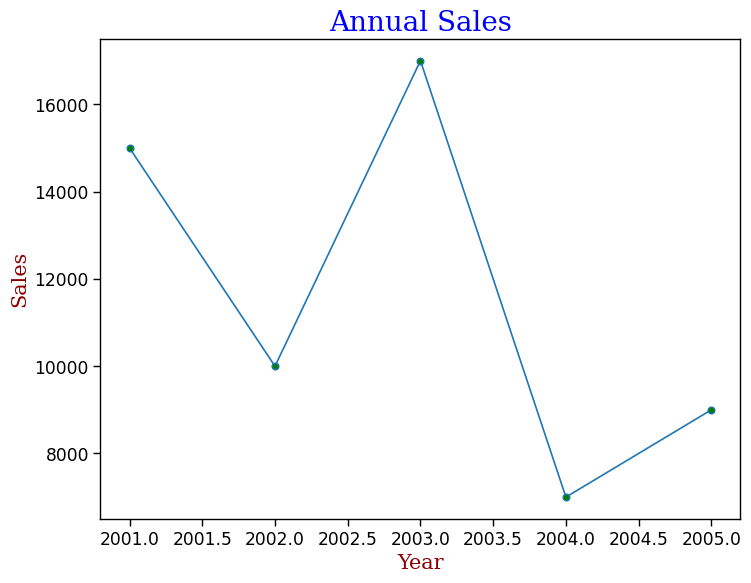

In [13]:
#Question 39 - "Create a figure object called fig using plt.figure() **
#** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
#** Plot (x,y) on that axes and set the labels.
#Note : You can plot on any x,y set of values."
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = [2001,2002,2003,2004,2005]
y = [15000,10000,17000,7000,9000]
ax.plot(x,y,marker = 'o',mfc = 'g')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Year",fontdict = font2)
plt.ylabel("Sales",fontdict=font2)
plt.title("Annual Sales",fontdict = font1)
plt.show()

In [14]:
#Question 40 - Show the records where the ExpectedLos is greater than the difference between the max and min ExpectedLos.
#Assuming the data is to be fetched from the discharges tables and not readmission registry
maxelos = Discharges['ExpectedLOS'].max()
minelos = Discharges['ExpectedLOS'].min()
diffelos = maxelos -minelos
display(Discharges[Discharges['ExpectedLOS'] > diffelos])

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ObservedMortality
12,398,134,2018-01-10,2018-01-15 16:43:47.026,Expired,ICU,Pneumonia,16.225126,0.460186,1
24,368,178,2018-01-14,2018-01-18 13:44:53.072,Expired,ICU,Spinal Cord Injury,15.183750,0.318426,1
31,369,198,2018-01-15,2018-01-31 14:28:07.437,Expired,ICU,Spinal Cord Injury,15.369330,0.082132,1
36,406,230,2018-01-18,2018-02-01 20:55:30.903,Expired,Cardiology,Afib,15.212173,0.487404,1
47,174,352,2018-01-29,2018-02-02 21:21:45.388,Expired,ICU,Pneumonia,16.989907,0.573870,1
87,295,560,2018-02-13,2018-02-26 18:17:22.826,Expired,Neurology,Heart Failure,16.785926,0.808604,1
92,297,588,2018-02-15,2018-02-26 14:46:54.780,Expired,Neurology,Stroke,15.958583,0.172149,1
101,691,709,2018-02-21,2018-03-01 08:44:33.655,Expired,Cardiology,Heart Failure,15.471412,0.362760,1
110,549,8,2018-01-01,2018-01-07 15:39:25.987,Home,Hospitalist,Pneumonia,16.472257,0.526198,0
119,252,19,2018-01-01,2018-01-17 14:13:23.627,Home,Hospitalist,Stroke,15.349671,0.478003,0


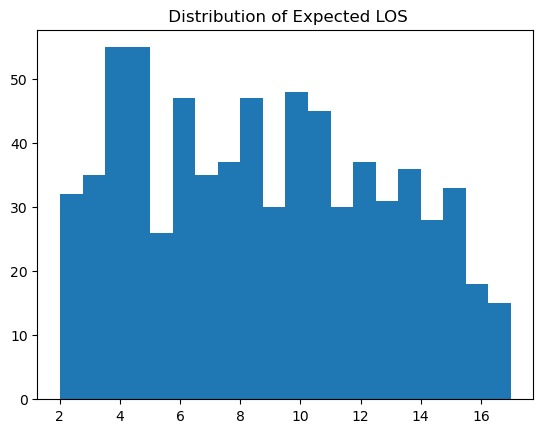

In [13]:
#Question 41 -Plot a graph to show the distribution of expected length of stay.
x = np.array(ReadmissionRegistry['ExpectedLOS'])
plt.hist(x, bins = 20)
plt.title(' Distribution of Expected LOS')
plt.show()


In [14]:
#Question 42 - Delete the column 'DischargeDispostion' iteratively.
#Original Dataframe
#ReadmissionRegistry.head()

ReadmissionRegistryEdited = ReadmissionRegistry
x= ['DischargeDisposition']
for i in x:
    if i in ReadmissionRegistryEdited:
        ReadmissionRegistryEdited.drop(i, axis=1, inplace=True)
        
ReadmissionRegistryEdited.head()


,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN


In [32]:
#Question 43 - Find the age prone to get stroke.


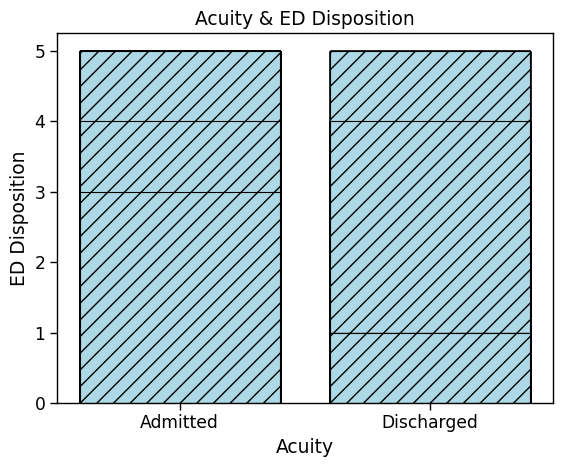

In [76]:
#Question 44 - Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

EDVisitsUnique = EDVisits.drop_duplicates()
#type(EDVisitsUnique)
acuity = EDVisitsUnique['Acuity'].to_numpy()
EDDisposition = EDVisitsUnique['EDDisposition'].to_numpy()
x=EDDisposition.tolist()
y=acuity.tolist()
bars =plt.bar(x, y, hatch ='//', color = 'lightblue', edgecolor = 'black')
#bars[0].set_facecolor('b')
#bars[0].set_edgecolor('r')
#bars[1].set_facecolor('b')
#bars[1].set_edgecolor('r')
#bars[0].set_hatch('/')
#bars[1].set_hatch('//')
plt.xlabel('Acuity')
plt.ylabel('ED Disposition')
plt.title('Acuity & ED Disposition')
plt.show()


In [60]:
#Question 45 - Usage of Enumeration in Python with any example

#enumerate() is used to add a counter to an iterable object such as list, tuple or dictionary and return it
# as an enumerating object. Used instead of a counter variable to keep track of number of iterations in loop. 


l1 = ['Cariology', 'Orthopedics', 'General Surgery', 'Urology', 'Nephrology', 'Pediatrics', 'ENT', 'Gastroentrology']

l2 = enumerate(l1)
print(list(l2))       # Notice the default index added in the output of this statement
print('\n')

l3 = enumerate(l1,4) # Pass the value of the custom index to start index at any other position other than 0.
print(list(l3)) 


[(0, 'Cariology'), (1, 'Orthopedics'), (2, 'General Surgery'), (3, 'Urology'), (4, 'Nephrology'), (5, 'Pediatrics'), (6, 'ENT'), (7, 'Gastroentrology')]


[(4, 'Cariology'), (5, 'Orthopedics'), (6, 'General Surgery'), (7, 'Urology'), (8, 'Nephrology'), (9, 'Pediatrics'), (10, 'ENT'), (11, 'Gastroentrology')]


C:\Users\akila\AppData\Local\Temp\ipykernel_29660\4004482711.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  EDVisits_mx = EDVisits.corr()


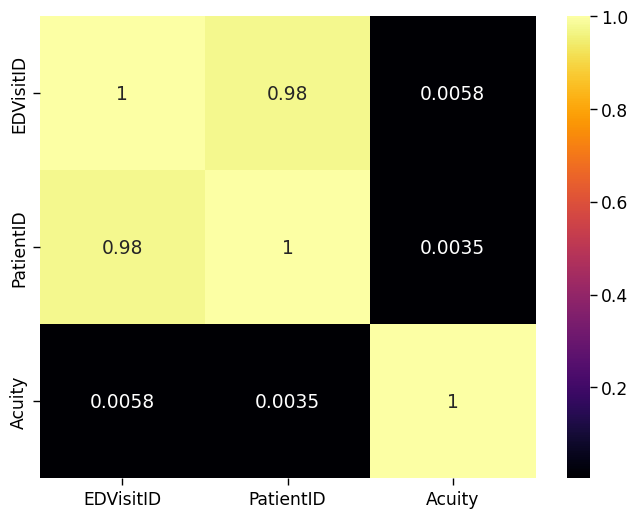

In [64]:
#Question 46- Create a heat map to show the correlation between the column values of Edvisits.

plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
EDVisits_mx = EDVisits.corr()
#crash_mx
sns.heatmap(EDVisits_mx, annot=True,cmap='inferno')
plt.show()


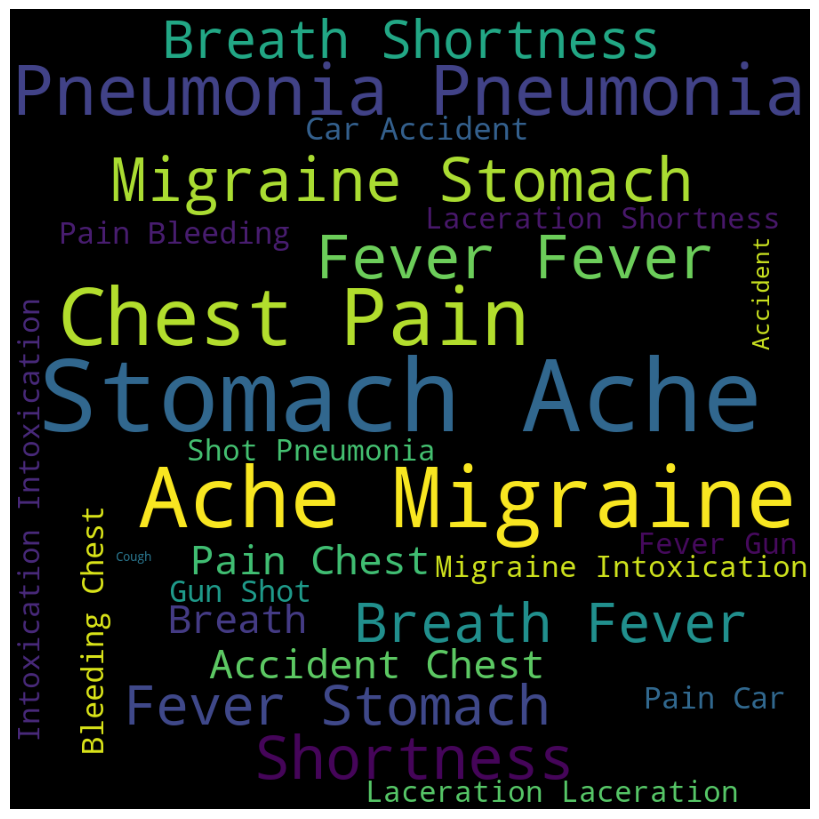

In [31]:
#Question 47 - Create a WordCloud Chart with Reason For Visit.
from wordcloud import WordCloud
import nltk                             #NLP library used for text processing, contains text cleaning functions & methods
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

rfv = EDVisits['ReasonForVisit'].to_numpy() # To convert pandas data frame column to numpy array
rfv_text  = ' '.join([str(i) for i in rfv]) # Creating string object to hold all the element of the array as single text

#Data cleaning
rfv_text_tokenized = word_tokenize(rfv_text)
rfv_cleaned = [i for i in rfv_text_tokenized if i.lower() not in stopwords.words('english')]

#Creating the word cloud
wc = WordCloud(width=900, height=900,
                      background_color='black',
                      min_font_size=11).generate(rfv_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [32]:
#Question 48 -List male patients over the age of 60 who have undergone surgery from January-March 2019.

#Merging 2 Dataframes 

# Calculating age from DOB

#Listing male patients with age > 60 who have under gone knee replacement(the only condition as per the data that definitely
# means patient underwent surgery, rest of the conditions may nor may not require surgery and there is no data in the 
#dataset regarding that) from January-March 2019

In [38]:
#Question 49 - Create a dataframe with acuity and 
# EDDisposition as the indices and the count of number of patients as the value.


In [39]:
#Question 50 - Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.
